# TF-IDF

## Input data

In [2]:
# list of best 100 film ever titles
titles = open('data/title_list.txt').read().split('\n')[0:100]

titles[:5]

['The Godfather',
 'The Shawshank Redemption',
 "Schindler's List",
 'Raging Bull',
 'Casablanca']

In [3]:
# list of best 100 film ever synopses
synopses = open('data/synopses_list.txt').read().split('\n BREAKS HERE')[0:100]

synopses[0]

' Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson 

## Text cleaning

In [4]:
!pip install spacy

In [36]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

!python -m spacy download en

nlp = spacy.load('en')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/ubuntu/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/en_core_web_sm
-->
/home/ubuntu/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [6]:
'my car is beautiful'.split()

['my', 'car', 'is', 'beautiful']

'cat' vs 'Cat'

In [38]:
tokens = nlp('Cat is not cats, (or yes)')

tokens

Cat is not cats, (or yes)

In [39]:
for token in tokens:
    print(token.lemma_)

Cat
be
not
cat
,
(
or
yes
)


In [40]:
import re

def spacy_tokenizer(synopsis):

    tokens = nlp(synopsis)
    
    black_list = ['plot', 'edit']
    
    filtered_tokens = []
    for word in tokens:
        lemma = word.lemma_.lower().strip()
        
        if lemma not in STOP_WORDS and lemma not in black_list and re.search('^[a-z]+$', lemma):
            filtered_tokens.append(lemma)

    return filtered_tokens

In [41]:
spacy_tokenizer(synopses[0])[:10]

['day',
 'daughter',
 'wedding',
 'vito',
 'corleone',
 'hear',
 'request',
 'role',
 'godfather',
 'don']

In [44]:
synopses[0][0:200]

" Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son,"

## TD-IDF

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=0.15, tokenizer=spacy_tokenizer)

tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)

tfidf_matrix.shape

(100, 275)

In [46]:
tfidf_matrix

<100x275 sparse matrix of type '<class 'numpy.float64'>'
	with 7783 stored elements in Compressed Sparse Row format>

In [47]:
tfidf_matrix.toarray()

array([[0.        , 0.18672037, 0.06689642, ..., 0.08907574, 0.13130075,
        0.04618612],
       [0.        , 0.        , 0.        , ..., 0.09197583, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05000763],
       [0.09000018, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.37675204, ..., 0.08361052, 0.        ,
        0.08670475]])

In [48]:
terms = tfidf_vectorizer.get_feature_names()

terms[:10]

['able',
 'accept',
 'act',
 'admit',
 'affair',
 'agree',
 'air',
 'allow',
 'american',
 'apartment']

In [52]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(tfidf_matrix)

dist.shape

(100, 100)

In [50]:
import numpy as np

np.array([[0,1], [0,1], [0,-1], [1,0]])

array([[ 0,  1],
       [ 0,  1],
       [ 0, -1],
       [ 1,  0]])

In [28]:
print(cosine_similarity([[0,1], [0,1], [0,-1], [1,0]]))
print(1 - cosine_similarity([[0,1], [0,1], [0,-1], [1,0]]))

[[ 1.  1. -1.  0.]
 [ 1.  1. -1.  0.]
 [-1. -1.  1.  0.]
 [ 0.  0.  0.  1.]]
[[0. 0. 2. 1.]
 [0. 0. 2. 1.]
 [2. 2. 0. 1.]
 [1. 1. 1. 0.]]


## Clustering

### UMAP

In [53]:
import warnings
from umap import UMAP

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    umap = UMAP(n_neighbors=5, random_state=42)
    embedding = umap.fit_transform(dist)

embedding[:5]

array([[ 1.7705828 ,  0.57941216],
       [ 0.43193474, -1.0327744 ],
       [-3.4421563 , -3.8235192 ],
       [ 3.3360147 , -1.0336529 ],
       [-0.36543646, -0.25294125]], dtype=float32)

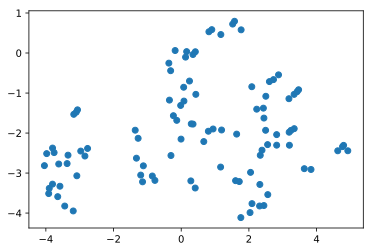

In [54]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline
set_matplotlib_formats('svg')

plt.scatter(embedding[:,0], embedding[:,1]);

### HDBSCAN

In [55]:
import numpy as np
from hdbscan import HDBSCAN
    
hdbscan = HDBSCAN(min_cluster_size=5)

clustering = hdbscan.fit_predict(embedding)

np.unique(clustering)

array([0, 1])

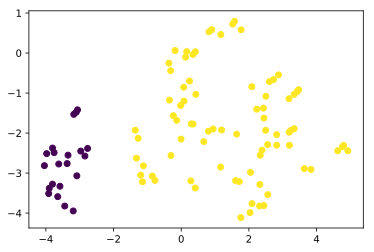

In [56]:
plt.scatter(embedding[:,0], embedding[:,1], c=clustering);

In [57]:
import pandas as pd

def get_titles_from_cluster(cluster):
    return pd.Series(titles)[clustering==cluster]

titles_cluster = get_titles_from_cluster(0)
titles_cluster

2                                      Schindler's List
10                                   Lawrence of Arabia
17                                   The Sound of Music
19                                            Star Wars
24                         The Bridge on the River Kwai
29    Dr. Strangelove or: How I Learned to Stop Worr...
31                                       Apocalypse Now
33        The Lord of the Rings: The Return of the King
34                                            Gladiator
36                                  Saving Private Ryan
38                              Raiders of the Lost Ark
48                                               Patton
50                                           Braveheart
55                                              Platoon
57                                   Dances with Wolves
58                                          The Pianist
61                                      The Deer Hunter
62                       All Quiet on the Wester

In [58]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
tfidf_df.head()

,able,accept,act,admit,affair,agree,air,allow,american,apartment,...,win,window,witness,woman,work,world,wound,year,york,young
0,0.0,0.18672,0.066896,0.000000,0.000000,0.046760,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.089076,0.131301,0.046186
1,0.0,0.00000,0.000000,0.074959,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.099018,0.059276,0.0,0.091976,0.000000,0.000000
2,0.0,0.00000,0.000000,0.000000,0.000000,0.050440,0.000000,0.121981,0.000000,0.0,...,0.073574,0.0,0.067138,0.055213,0.000000,0.154811,0.0,0.000000,0.000000,0.000000
3,0.0,0.00000,0.000000,0.000000,0.140395,0.000000,0.070197,0.000000,0.090276,0.0,...,0.131907,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.043067,0.190445,0.000000
4,0.0,0.00000,0.000000,0.000000,0.000000,0.054422,0.000000,0.065806,0.072439,0.0,...,0.000000,0.0,0.000000,0.000000,0.055805,0.000000,0.0,0.000000,0.000000,0.000000


In [59]:
def get_df_from_cluster(cluster):
    return tfidf_df[clustering==cluster]

get_df_from_cluster(0)

,able,accept,act,admit,affair,agree,air,allow,american,apartment,...,win,window,witness,woman,work,world,wound,year,york,young
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.050440,0.000000,0.121981,0.000000,0.000000,...,0.073574,0.000000,0.067138,0.055213,0.000000,0.154811,0.000000,0.000000,0.000000,0.000000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072012,0.000000,...,0.078915,0.000000,0.000000,0.000000,0.000000,0.166050,0.000000,0.000000,0.000000,0.000000
17,0.041107,0.072024,0.038706,0.000000,0.000000,0.081165,0.000000,0.032715,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051539,0.000000,0.026723
19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.056616,0.046560,0.174463,0.078330,0.169849,0.000000,0.000000,0.000000
29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.308786,0.087454,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.037082,0.044397,0.000000,0.034444,0.000000,0.000000
31,0.000000,0.000000,0.000000,0.000000,0.000000,0.116576,0.090493,0.070481,0.077584,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.059769,0.000000,0.155169,0.000000,0.000000,0.000000
33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.049582,0.000000,0.000000,0.060290,0.043143,0.000000,0.000000
34,0.053887,0.000000,0.000000,0.055062,0.000000,0.000000,0.000000,0.042885,0.000000,0.000000,...,0.206931,0.000000,0.000000,0.000000,0.000000,0.000000,0.047208,0.000000,0.000000,0.035031
36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063812,0.316096,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140487,0.000000,0.000000,0.000000


In [60]:
get_df_from_cluster(0).T.head()

,2,10,17,19,24,29,31,33,34,36,...,48,50,55,57,58,61,62,87,88,89
able,0.0,0.0,0.041107,0.0,0.0,0.0,0.0,0.0,0.053887,0.0,...,0.0,0.000000,0.0,0.000000,0.081656,0.048698,0.0,0.000000,0.0,0.0
accept,0.0,0.0,0.072024,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.069171,0.0,0.067447,0.000000,0.000000,0.0,0.000000,0.0,0.0
act,0.0,0.0,0.038706,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.072493,0.000000,0.206340,0.0,0.000000,0.0,0.0
admit,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.055062,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.077585,0.0,0.0
affair,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.080679,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [61]:
top_words_cluster = get_df_from_cluster(0).T.sum(axis=1).sort_values(ascending=False)
top_words_cluster.head()

army       2.953313
soldier    2.868414
war        2.750088
captain    2.285291
kill       2.174115
dtype: float64

In [62]:
titles_cluster

2                                      Schindler's List
10                                   Lawrence of Arabia
17                                   The Sound of Music
19                                            Star Wars
24                         The Bridge on the River Kwai
29    Dr. Strangelove or: How I Learned to Stop Worr...
31                                       Apocalypse Now
33        The Lord of the Rings: The Return of the King
34                                            Gladiator
36                                  Saving Private Ryan
38                              Raiders of the Lost Ark
48                                               Patton
50                                           Braveheart
55                                              Platoon
57                                   Dances with Wolves
58                                          The Pianist
61                                      The Deer Hunter
62                       All Quiet on the Wester